In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package punkt to C:\Users\Srikar
[nltk_data]     Nadella\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Srikar Nadella\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Srikar
[nltk_data]     Nadella\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Srikar
[nltk_data]     Nadella\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [67]:
#Load data
df = pd.read_csv('reviews_limited.csv')
df = df.head(1000)
print(df.head())
df.shape

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

(1000, 10)

Text(0.5, 0, 'Review Stars')

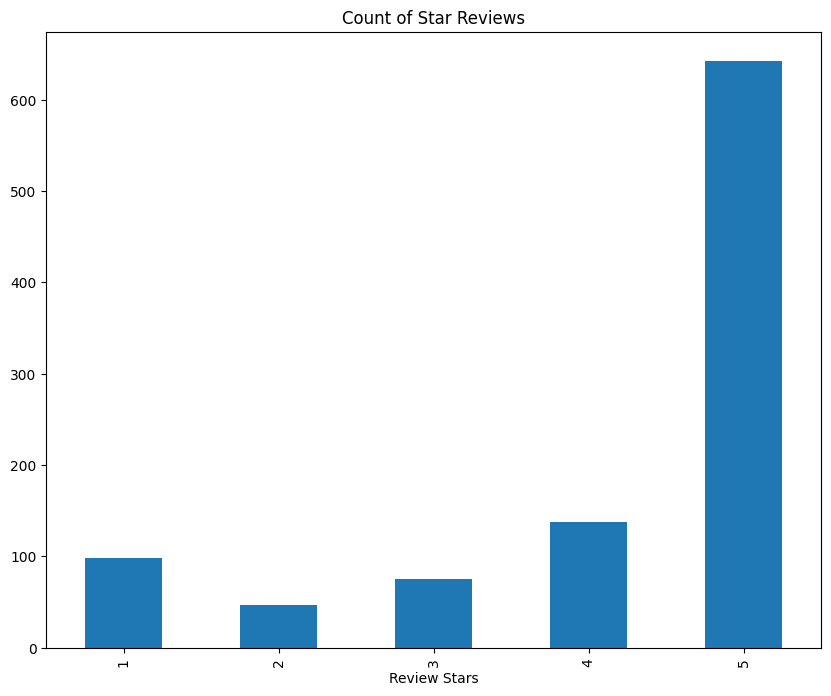

In [68]:
#Analysis of ratings
ax = df['Score'].value_counts().sort_index().plot(kind='bar', title = "Count of Star Reviews", figsize = (10,8))
ax.set_xlabel('Review Stars')

Noted that there are many more 5 star reviews showing bias towards positivity


In [69]:
test = df['Text'][36]
tokens = nltk.word_tokenize(test)
tokens[:10]

['For',
 'those',
 'of',
 'us',
 'with',
 'celiac',
 'disease',
 'this',
 'product',
 'is']

In [70]:
tagged = nltk.pos_tag(tokens)

This is the link that shows what the tagging means for the parts of speech
https://www.geeksforgeeks.org/part-speech-tagging-stop-words-using-nltk-python/

In [71]:
entities = nltk.chunk.ne_chunk(tagged)
#Chunks the text together
entities.pprint()

(S
  For/IN
  those/DT
  of/IN
  us/PRP
  with/IN
  celiac/JJ
  disease/NN
  this/DT
  product/NN
  is/VBZ
  a/DT
  lifesaver/NN
  and/CC
  what/WP
  could/MD
  be/VB
  better/JJR
  than/IN
  getting/VBG
  it/PRP
  at/IN
  almost/RB
  half/PDT
  the/DT
  price/NN
  of/IN
  the/DT
  grocery/NN
  or/CC
  health/NN
  food/NN
  store/NN
  !/.
  I/PRP
  love/VBP
  (PERSON McCann/NNP)
  's/POS
  instant/JJ
  oatmeal/NN
  -/:
  all/DT
  flavors/NNS
  !/.
  !/.
  !/.
  </JJ
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  Thanks/NNP
  ,/,
  </NNP
  br/NN
  //NNP
  >/NNP
  Abby/NNP)


Vader Sentiment Scoring
Essentially takes the word and has a score based on its positivity or negativity


In [72]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [73]:
analyzer.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

Note the positive overall compound score

In [74]:
analyzer.polarity_scores('I am so sad!')

{'neg': 0.648, 'neu': 0.352, 'pos': 0.0, 'compound': -0.5697}

Note the negative overall compound score


In [75]:
# Polarity for the entire dataset without tqdm
scores = {}

for i, row in df.iterrows():
    text = row['Text']
    myid = row['Id']
    scores[myid] = analyzer.polarity_scores(text)

print(scores)


{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}, 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664}, 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265}, 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468}, 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883}, 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346}, 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487}, 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369}, 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313}, 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}, 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579}, 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296}, 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466}, 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486}, 16: {'neg': 0.0

In [76]:
vaders = pd.DataFrame(scores).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df,how="left")

In [77]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Now we have the reviews matched with the sentiment analysis

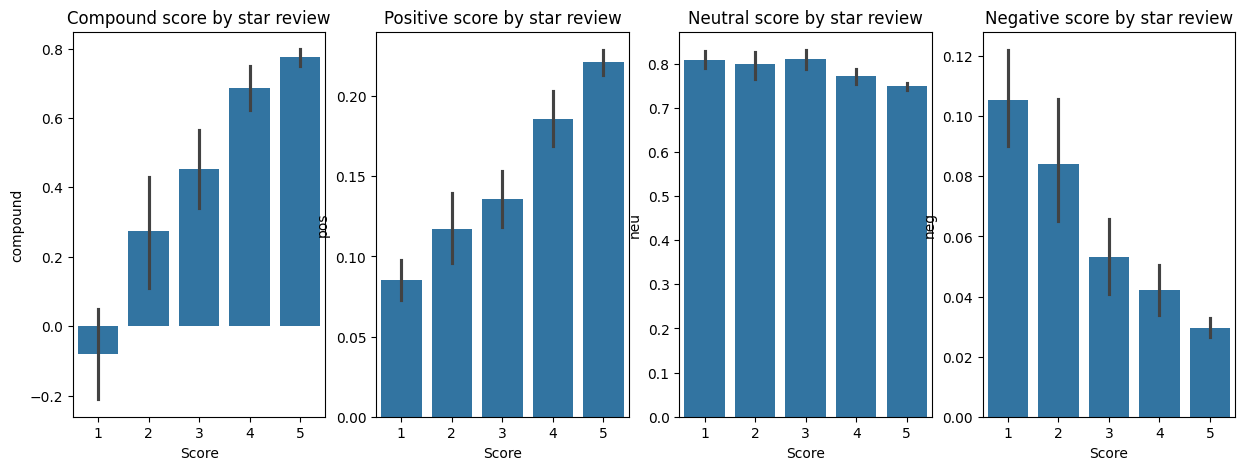

In [78]:
fig, axs = plt.subplots(1,4,figsize=(15,5))
sns.barplot(data=vaders,x="Score",y='compound', ax = axs[0])
sns.barplot(data=vaders,x="Score",y='pos', ax = axs[1])
sns.barplot(data=vaders,x="Score",y='neu', ax = axs[2])
sns.barplot(data=vaders,x="Score",y='neg', ax = axs[3])
axs[0].set_title("Compound score by star review")
axs[1].set_title("Positive score by star review")
axs[2].set_title("Neutral score by star review")
axs[3].set_title("Negative score by star review")
plt.tight_layout
plt.show()

Summary: This form of sentiment analysis goes through by summing up scores of the words used in the text

In [79]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [80]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [81]:
print(test)

For those of us with celiac disease this product is a lifesaver and what could be better than getting it at almost half the price of the grocery or health food store!  I love McCann's instant oatmeal - all flavors!!!<br /><br />Thanks,<br />Abby


In [82]:
#Comparison to the Vader model
analyzer.polarity_scores(test)

{'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'compound': 0.9196}

In [83]:
#Roberta Model
encoded = tokenizer(test, return_tensors='pt')
output = model(**encoded)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.002434576, 'roberta_neu': 0.011576174, 'roberta_pos': 0.9859892}


In [84]:
def roberta_polarity(input):
    encoded = tokenizer(input, return_tensors='pt')
    output = model(**encoded)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [85]:
# Polarity for the entire dataset without tqdm
scores = {}
for i, row in df.iterrows():
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = analyzer.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        vader_result = analyzer.polarity_scores(text)
        roberta_result = roberta_polarity(text)
        both = {**vader_result, **roberta_result}
        scores[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')
print(scores)

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863
{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441, 'roberta_neg': 0.009624249, 'roberta_neu': 0.049980447, 'roberta_pos': 0.9403953}, 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664, 'roberta_neg': 0.5089861, 'roberta_neu': 0.45241356, 'roberta_pos': 0.038600363}, 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265, 'roberta_neg': 0.003228897, 'roberta_neu': 0.09806738, 'roberta_pos': 0.8987037}, 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'roberta_neg': 0.0022951285, 'roberta_neu': 0.09021923, 'roberta_pos': 0.90748566}, 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468, 'roberta_neg': 0.0016347291, 'roberta_neu': 0.01030247, 'roberta_pos': 0.98806286}, 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883, 'roberta_neg': 0.0061295927, 'roberta_neu': 0.021795873, 'roberta_pos': 0.97207457}, 7: {'neg': 0.034,

In [86]:
results_df = pd.DataFrame(scores).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [88]:
print(results_df.columns)


Index(['Id', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')


Compare scores between models

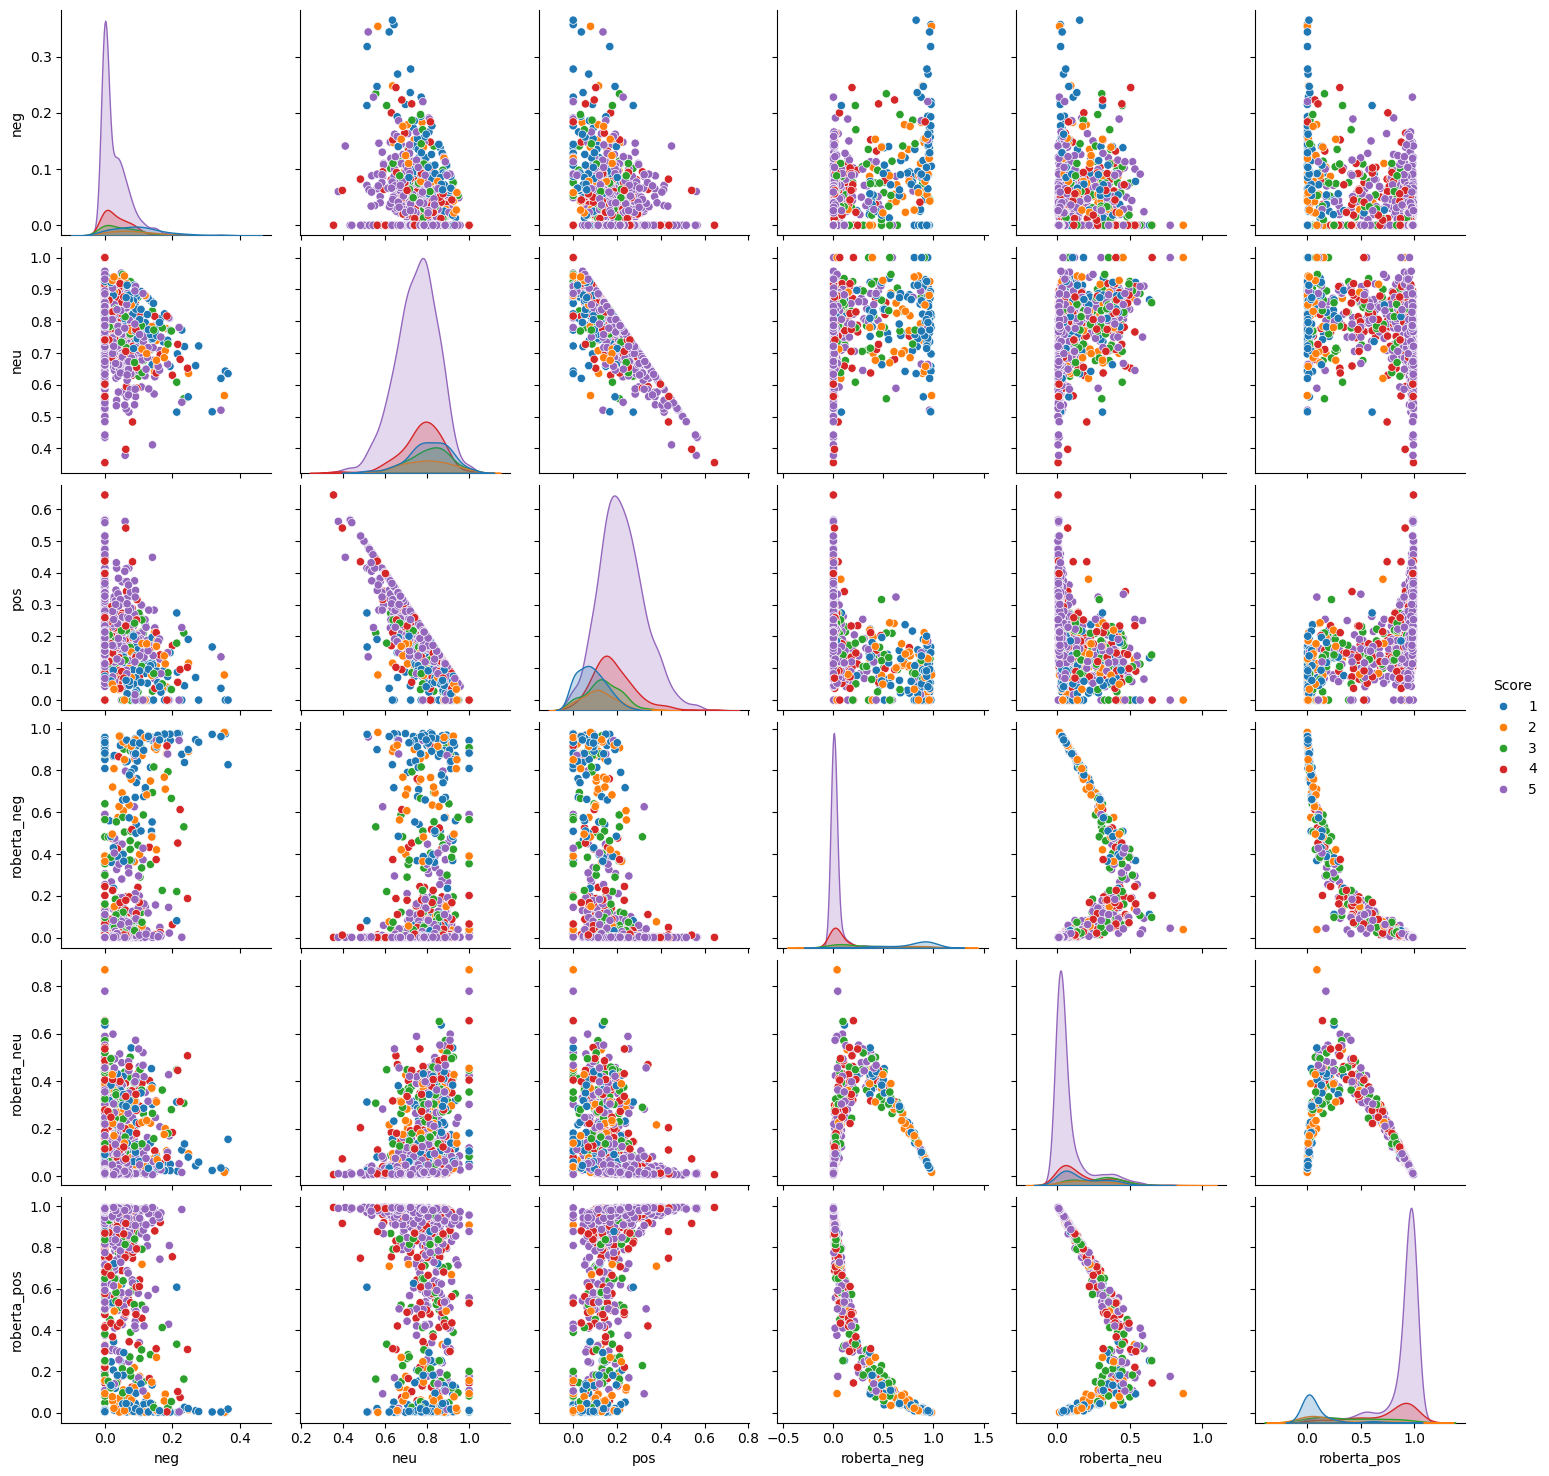

In [89]:
sns.pairplot(data=results_df,
             vars=['neg', 'neu', 'pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

Examples of where the model rating contrasts with the actual

In [90]:
results_df.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

Very Negatively rated review but model rated it higher

Tool to do sentiment analysis in two lines

In [92]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [93]:
sent_pipeline('I love everything and I am so happy!')


[{'label': 'POSITIVE', 'score': 0.9998874664306641}]

In [94]:
sent_pipeline('I hate everything and I am so sad!')


[{'label': 'NEGATIVE', 'score': 0.9972742199897766}]